# Project description

You work for startup who selling food. You need to figure out how users behave in mobile. 
Analyze sales funnel. Find out how users get to purchase. How many users reach  purchase, and how many are "stuck" in the previous steps? What are these steps?

After that, analyze results of A/A/B test. Designers wanted to change fonts throughout application, and managers were afraid  it would be unusual for users. We agreed to make decision based on results of A/A/B test. Users were divided into 3 groups: 2 control groups with old fonts and one experimental group with new ones. Find out which font is better.
Creating two A groups instead of one has certain advantages. If two control groups turn out to be equal, you can be sure of testnaccuracy. If there are significant differences between values of A and A, this will help to identify factors that led to the distortion of the results. Comparing to control group also helps to understand how much time and data will be required for further tests.

Due to general analytics and A/A/B test, work with the same data. Tests are always on-the-go in real projects. Analysts analysing quality of application based on general data, without taking into account whether users belong to test.

# Data description

Each log entry is a user action or event.
- eventName — the name of event;
- DeviceIDHash is a unique user ID;
- EventTimestamp — time of event;
- ExpId is test number: 246 and 247 are control groups, and 248 is testing group.

# Project navigation

[1. Loading data from CSV files into dataframes using libraries. Check general info](#1.-Loading-data-from-CSV-files-into-dataframes-using-libraries.-Check-general-info)

[2. Data preprocessing](#2.-Data-preprocessing)
   - [2.1 Rename columns](#2.1-Rename-columns)
   - [2.2 Check missing values and data types](#2.2-Check-missing-values-and-data-types)
   - [2.3 Remove duplicates](#2.3-Remove-duplicates)

[3. Exploratory data analysis](#3.-Exploratory-data-analysis)
   - [3.1 How many events are in log?](#3.1-How-many-events-are-in-log?)
   - [3.2 How many users in log?](#3.2-How-many-users-in-log?)
   - [3.3 What is average events qty per user?](#3.3-What-is-average-events-qty-per-user?)
   - [3.4 Check time period of dataframe](#3.4-Check-time-period-of-dataframe)
   - [3.5 How many events we were lost after removing old data?](#3.5-How-many-events-we-were-lost-after-removing-old-data?)
   - [3.6 Check that you have users in each test group](#3.6-Check-that-you-have-users-in-each-test-group)

[4. Analyze funnel events](#4.-Analyze-funnel-events)
   - [4.1 What types of events are in logs and how often they occur](#4.1-What-types-of-events-are-in-logs-and-how-often-they-occur)
   - [4.2 Calculate how many users executed each type of event?](#4.2-Calculate-how-many-users-executed-each-type-of-event?)
   - [4.3 Based on funnel of events, calculate what proportion of users passes to next step of funnel (from number of users in previous one).](#4.3-Based-on-funnel-of-events,-calculate-what-proportion-of-users-passes-to-next-step-of-funnel-(from-number-of-users-in-previous-one).)

[5. Analyze A/A/B test results](#5.-Analyze-A/A/B-test-results)
   - [5.1 How many users in each group?](#5.1-How-many-users-in-each-group?)
   - [5.2 Analyzing А/А test](#5.2-Analyzing-А/А-test)
      - [5.2.1 Indicate most popular event. Count number of users who committed this event in each control groups. Calculate % of users who committed this event](#5.2.1-Indicate-most-popular-event.-Count-number-of-users-who-committed-this-event-in-each-control-groups.-Calculate-%-of-users-who-committed-this-event)
      - [5.2.2 Check if statistical criteria find difference between samples 246 and 247.](#5.2.2-Check-if-statistical-criteria-find-difference-between-samples-246-and-247.)
   - [5.3 Analyzing А/B test](#5.3-Analyzing-А/B-test)
      - [5.3.1 Do same action with `changed font` group. Compare results to each control group individually by event. Compare results to combined control group. What conclusions can be made from test?](#5.3.1-Do-same-action-with-`changed-font`-group.-Compare-results-to-each-control-group-individually-by-event.-Compare-results-to-combined-control-group.-What-conclusions-can-be-made-from-test?)
      - [5.3.2 Test hypothesis of proportions equality between two samples in A/B-test for event "MainScreenAppear"](#5.3.2-Test-hypothesis-of-proportions-equality-between-two-samples-in-A/B-test-for-event-"MainScreenAppear")
      - [5.3.3 Test hypothesis of proportions equality between two samples in A/B-test for event "OffersScreenAppear"](#5.3.3-Test-hypothesis-of-proportions-equality-between-two-samples-in-A/B-test-for-event-"OffersScreenAppear")
      - [5.3.4 Test hypothesis of proportions equality between two samples in A/B-test for event "CartScreenAppear"](#5.3.4-Test-hypothesis-of-proportions-equality-between-two-samples-in-A/B-test-for-event-"CartScreenAppear")
      - [5.3.5 Test hypothesis of proportions equality between two samples in A/B-test for event "PaymentScreenSuccessful"](#5.3.5-Test-hypothesis-of-proportions-equality-between-two-samples-in-A/B-test-for-event-"PaymentScreenSuccessful")

[Main summary](#Main-summary)


In [1]:
pip install -U kaleido

Requirement already up-to-date: kaleido in c:\users\ip190\anaconda3\lib\site-packages (0.2.1)
Note: you may need to restart the kernel to use updated packages.


## 1. Loading data from CSV files into dataframes using libraries. Check general info

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
register_matplotlib_converters()
import seaborn as sns
sns.set()

import datetime as dt
from datetime import datetime, timedelta

from scipy import stats as st
import math

In [3]:
# split data with help of sep
log_event = pd.read_csv('logs_exp.csv', sep='\t')

In [4]:
#  writing a function to display general information
def display_general_info(df):
    df.info()
    display(df.head())    
    display(df.duplicated().sum())    
    display(pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm'))

In [5]:
display_general_info(log_event)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


413

,0
EventName,0.000000
DeviceIDHash,0.000000
EventTimestamp,0.000000
ExpId,0.000000


As a result of output general information of dataframe, following preprocessing must be done:
 - rename columns and data in `eventName` column
 - change data type of EventTimestamp - from numeric to date
 - remove 413 explicit duplicates. it is less than 1% of dataframe data

##  2. Data preprocessing

### 2.1 Rename columns

In [6]:
log_event=log_event.rename(columns={'EventName':'event_name', 'DeviceIDHash':'device_id_hash','EventTimestamp':'event_timestamp', 'ExpId':'exp_id'})
log_event.head(2)

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246


### 2.2 Check missing values and data types 

In [7]:
# add new columns with time and date, converting event_timestamp to data typr -  datetime64
log_event['event_datetime'] = pd.to_datetime(log_event['event_timestamp'],unit='s')
log_event['event_date'] = log_event['event_datetime'].astype('datetime64[D]')

# check data
display(log_event.head(2))
log_event.info()

,event_name,device_id_hash,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  int64         
 4   event_datetime   244126 non-null  datetime64[ns]
 5   event_date       244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


### 2.3 Remove duplicates

In [8]:
log_event=log_event.drop_duplicates().reset_index(drop=True)

# check duplicates after their removing
log_event.duplicated().sum()

0

## 3. Exploratory data analysis

### 3.1 How many events are in log?

In [9]:
print('Total events qty %d, unique types of events %d.' % (log_event['event_name'].count(), log_event['event_name'].nunique()))

Total events qty 243713, unique types of events 5.


### 3.2 How many users in log?

In [10]:
print('Total user qty %d.' % (log_event['device_id_hash'].nunique()))

Total user qty 7551.


### 3.3 What is average events qty per user?

In [11]:
print('Average events qty per user %d.' % (log_event['event_name'].count()/log_event['device_id_hash'].nunique()))

Average events qty per user 32.


### 3.4 Check time period of dataframe

What period of data do you have? Find maximum and minimum dates. Analyze how data were changing: build bar chart which displays events qty depending on time by groups. Are you shure that you have complete data for entire period? Determine when data is complete and discard older ones. What period of time do you actually have data for?

In [12]:
display(log_event['event_datetime'].min())
display(log_event['event_datetime'].max())

Timestamp('2019-07-25 04:43:36')

Timestamp('2019-08-07 21:15:17')

In [13]:
# creating DataFrame event_by_date with aggregated data by groups and dates
event_by_date = log_event.groupby(['event_date', 'exp_id'])['device_id_hash'].count().reset_index()
# preparing data for further visualization by groups
event_by_date_246=event_by_date.query('exp_id == 246')
event_by_date_247=event_by_date.query('exp_id == 247')
event_by_date_248=event_by_date.query('exp_id == 248')

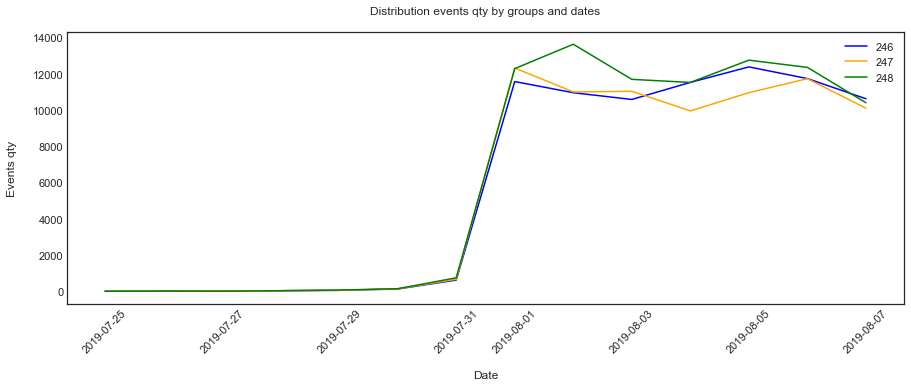

In [14]:
# visualize
plt.figure(figsize=(15,5))
plt.style.use('seaborn-white')
plt.title('Distribution events qty by groups and dates\n  ')
plt.xlabel('\nDate')
plt.ylabel('Events qty\n')

plt.plot(event_by_date_246['event_date'], event_by_date_246['device_id_hash'], label='246', color='blue')
plt.plot(event_by_date_247['event_date'], event_by_date_247['device_id_hash'], label='247', color='orange')
plt.plot(event_by_date_248['event_date'], event_by_date_248['device_id_hash'], label='248', color='green')

plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.show()


Until June 31, 2019, there is zero number of events in three groups. Propose to remove data until June 31 inclusive.

In [15]:
log_event_filtered = log_event[log_event['event_date'] > '2019-07-31'].reset_index(drop=True)
log_event_filtered['event_date'].min()

Timestamp('2019-08-01 00:00:00')

### 3.5 How many events we were lost after removing old data?

In [16]:
print('Lost events after removing old data: {:.2%}'.format(1 - log_event_filtered['event_name'].count() / log_event['event_name'].count()))

Lost events after removing old data: 1.16%


In [17]:
# events qty
print(
    '\n Event qty after removing old data:', log_event_filtered.shape[0],
    '\n Lost events:', log_event.shape[0] - log_event_filtered.shape[0],
    '\n % events from original:', round(log_event_filtered.shape[0]/log_event.shape[0]*100, 2)
     )

# unique users qty
print(
    '\n Users qty after removing old data:', len(log_event_filtered['device_id_hash'].unique()),
    '\n Lost users:', len(log_event['device_id_hash'].unique()) - len(log_event_filtered['device_id_hash'].unique()),
    '\n % users from original', round(log_event_filtered['device_id_hash'].nunique() / log_event['device_id_hash'].nunique()*100, 2))


 Event qty after removing old data: 240887 
 Lost events: 2826 
 % events from original: 98.84

 Users qty after removing old data: 7534 
 Lost users: 17 
 % users from original 99.77


- Lost events are 2826 , it is 1.16%.
- Lost users are 17, it is 0.23%

### 3.6 Check that you have users in each test group

In [18]:
users_per_group=log_event_filtered.groupby('exp_id')['device_id_hash'].agg('nunique')
users_per_group

exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64

Users are in 3 test groups.

**Section summary:**

As a result of exploratory data, following statements were made:
- there are 243k events in log dataframe, while there are 5 types.
- there are 7551 users and about 32 events per user
- data is available in period from July, 25 to August, 7, while there are practically no events in 3 test groups until July 31. It was decided to remove this data to improve further analysis.
- there are users in 3 experimental groups and the approximate number of them is 2500 per each.

## 4. Analyze funnel events

### 4.1 What types of events are in logs and how often they occur

In [19]:
pd.DataFrame(log_event_filtered['event_name'].value_counts().sort_values(ascending=False))

,event_name
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


The `MainScreenAppear` event appears most often, which is logical in funnel sequence of events

### 4.2 Calculate how many users executed each type of event?

In [20]:
# sorting events by uers qty. Calculate share of users who made event at least 1 time
event_to_user=log_event_filtered.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False).reset_index().rename(columns={'device_id_hash': 'total_users'})
total_users=log_event_filtered['device_id_hash'].nunique()
event_to_user['percentage']=round((event_to_user['total_users']/total_users*100),2)
event_to_user

,event_name,total_users,percentage
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


Sequence of events are equal to frequancy of events(total_users), mean, start event `MainScreenAppear`-> than `OffersScreenAppear`->`CartScreenAppear`->`PaymentScreenSuccessful`->`Tutorial`. 
Meanwhile only 98.5% users start with `MainScreenAppear`. 1.5% is somewhere lost (may technical issue).

### 4.3 Based on funnel of events, calculate what proportion of users passes to next step of funnel (from number of users in previous one).

In [21]:
#  shifting  total_users down one row
event_to_user['steps'] = event_to_user['total_users'].shift()

# conversion of next step in relation to previous one
event_to_user['conversion'] = round(event_to_user['total_users'] / event_to_user['steps'] * 100, 2) 

# remove column steps
event_to_user.drop(columns= ['steps'], axis = 1, inplace = True)

# replace NaN in first row to 100%
event_to_user = event_to_user.fillna(100)
event_to_user

,event_name,total_users,percentage,conversion
0,MainScreenAppear,7419,98.47,100.00
1,OffersScreenAppear,4593,60.96,61.91
2,CartScreenAppear,3734,49.56,81.30
3,PaymentScreenSuccessful,3539,46.97,94.78
4,Tutorial,840,11.15,23.74


Suggested removing `Tutorial` from funnel, obviously that not everyone passes this event, this event is not mandatory for building logic sequence of events.

In [22]:
event_to_user = event_to_user.query('event_name != "Tutorial"').reset_index(drop=True)

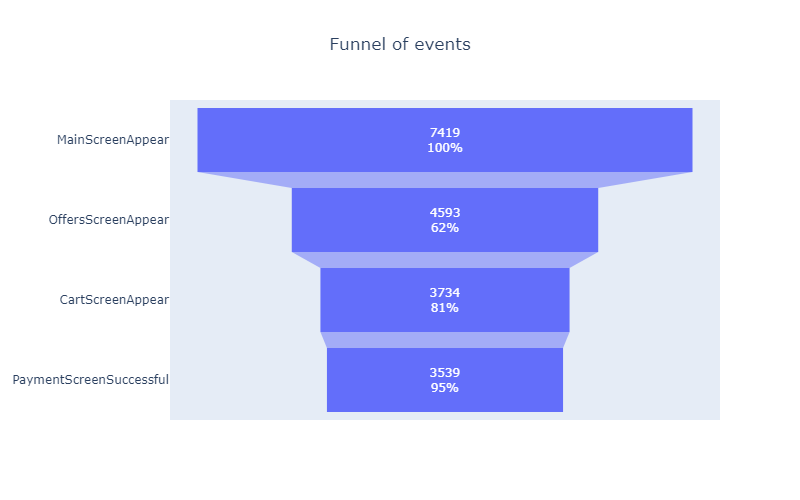

In [23]:
# visualizing funnel without Tutorial

fig = go.Figure(go.Funnel(
    y=event_to_user['event_name'],
    x=event_to_user['total_users'],
    textposition="inside",
    textinfo="value+percent previous"))

fig.update_layout(
    title="Funnel of events", title_x=0.50,
    font=dict(size=12),
    width=800,
    height=500)

fig.show("png")

**Section summary:**

In process of analysis of events funnel, it was revealed that:
- most events (7419) are in `MainScreenAppear` stage of application.
- sequance of events is set:
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear	
4. PaymentScreenSuccessful


- calculated percentages of users going through each step. It was revealed that only 47% of users reach moment of Payment for product, and almost 40% of users have already been eliminated from Main page. This is reason to worry and we recommend analysing what is happening while switching Main page to product selection Page.

## 5. Analyze A/A/B test results

### 5.1 How many users in each group?

In [24]:
users_per_exp=log_event_filtered.groupby('exp_id')['device_id_hash'].nunique().sort_values(ascending=False).reset_index()
users_per_exp

,exp_id,device_id_hash
0,248,2537
1,247,2513
2,246,2484


Number of users in each experimental group is almost same and is around 2500 users

Check duplicated users in all groups.

In [25]:
# sorting users by groups
users_246 = set(log_event_filtered[log_event_filtered['exp_id'] == 246]['device_id_hash'])
users_247 = set(log_event_filtered[log_event_filtered['exp_id'] == 247]['device_id_hash'])
users_248 = set(log_event_filtered[log_event_filtered['exp_id'] == 248]['device_id_hash'])


# write function for multiple intersection-sets
def intersect_multi(a, *others):
    result = a.copy()
    for other in others:
        newresult = result.intersection(other)
        if not newresult:
            return set()
    result = newresult

# check intersections
intersect_multi(users_246, users_247,users_248)

set()

No intersections values are found.

###  5.2 Analyzing А/А test

#### 5.2.1 Indicate most popular event. Count number of users who committed this event in each control groups. Calculate % of users who committed this event

In [26]:
def event_group_pivot(group):
    result = (
        log_event_filtered
        .query('exp_id == @group and event_name != "Tutorial"')
        .groupby('event_name')
        .agg(device_count=('device_id_hash', 'nunique'))
        .sort_values(by='device_count', ascending=False)
        .reset_index()
    )
    return result

def event_group_ratio(df):
    unique_devices = log_event_filtered['device_id_hash'].nunique()
    df['ratio'] = round((df['device_count'] / unique_devices), 3)

# tables for each group
event_246_pivot = event_group_pivot(246)
event_group_ratio(event_246_pivot)
event_246_pivot.columns = ['event_name', '246', '246_per_user']

event_247_pivot = event_group_pivot(247)
event_group_ratio(event_247_pivot)
event_247_pivot.columns = ['event_name', '247', '247_per_user']

event_248_pivot = event_group_pivot(248)
event_group_ratio(event_248_pivot)
event_248_pivot.columns = ['event_name', '248', '248_per_user']

# merging tables
event_group_pivot = (
    event_246_pivot
    .merge(event_247_pivot, on='event_name')
    .merge(event_248_pivot, on='event_name')
    )

event_group_pivot

,event_name,246,246_per_user,247,247_per_user,248,248_per_user
0,MainScreenAppear,2450,0.325,2476,0.329,2493,0.331
1,OffersScreenAppear,1542,0.205,1520,0.202,1531,0.203
2,CartScreenAppear,1266,0.168,1238,0.164,1230,0.163
3,PaymentScreenSuccessful,1200,0.159,1158,0.154,1181,0.157


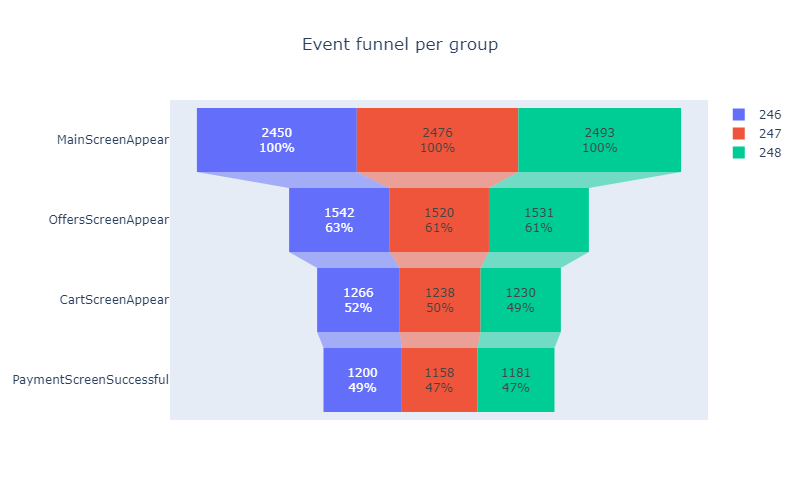

In [27]:
#  visualizing event funnel per group
fig = go.Figure(go.Funnel(
    name='246',
    y = event_group_pivot['event_name'],
    x = event_group_pivot['246'],
    textinfo = 'value+percent initial'))

fig.add_trace(go.Funnel(
    name='247',
    y = event_group_pivot['event_name'],
    x = event_group_pivot['247'],
    textinfo = 'value+percent initial'))

fig.add_trace(go.Funnel(
    name='248',
    y = event_group_pivot['event_name'],
    x = event_group_pivot['248'],
    textinfo = 'value+percent initial'))

fig.update_layout(
    title="Event funnel per group", title_x=0.50,
    font=dict(size=12),
    width=800,
    height=500)

fig.show("png")

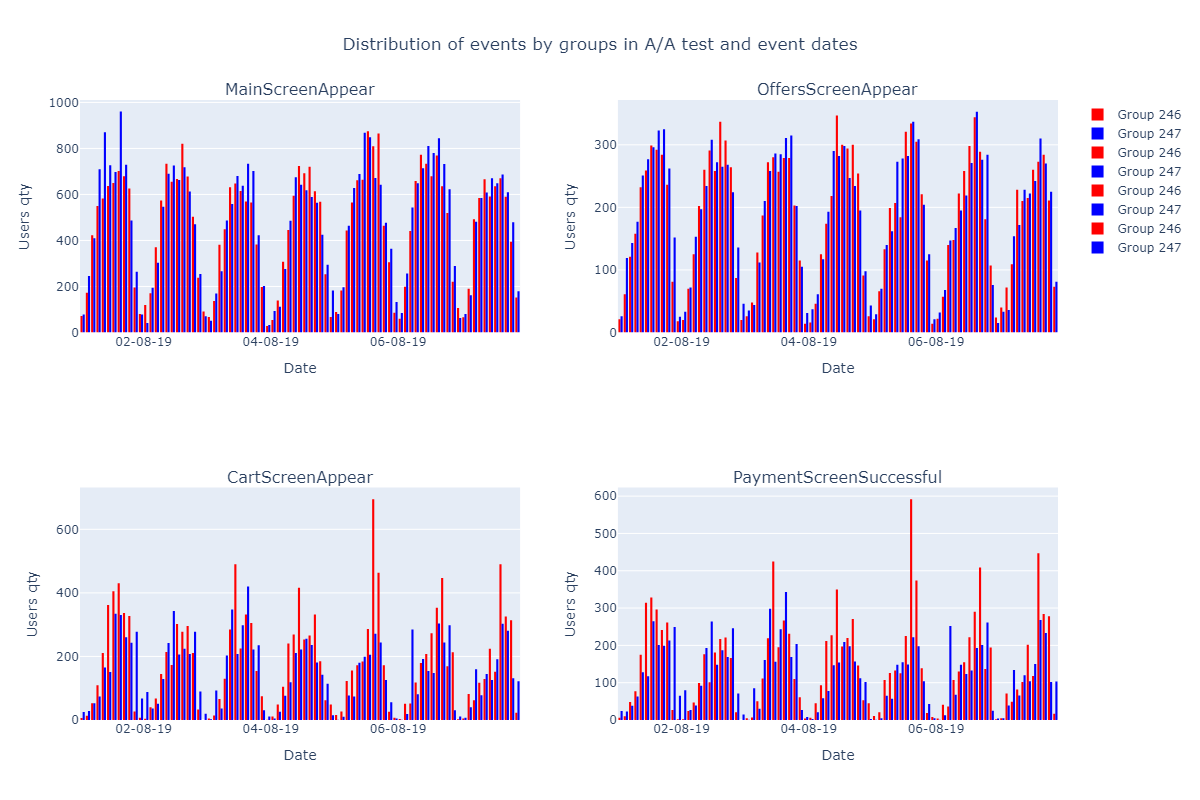

In [28]:
# visualizing distribution of events between two compared groups 
log_event_filtered_2groups=log_event_filtered[log_event_filtered['exp_id']!=248]

colors = ['red', 'blue']
fig = make_subplots(rows=2, cols=2, subplot_titles=[
    'MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'
])

fig.update_layout(title='Distribution of events by groups in A/A test and event dates', height=800, title_x=0.50)

for idx, event_name in enumerate(['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'], 1):
    row = (idx - 1) // 2 + 1
    col = idx % 2 if idx % 2 else 2
    for i, exp_id in enumerate(log_event_filtered_2groups['exp_id'].unique()):
        data = log_event_filtered_2groups.query('event_name == @event_name and exp_id == @exp_id')['event_datetime']
        fig.add_trace(go.Histogram(x=data, name=f'Group {exp_id}', marker_color=colors[i]), row=row, col=col)

fig.update_xaxes(title_text='Date', tickformat='%d-%m-%y', row=1, col=1)
fig.update_xaxes(title_text='Date', tickformat='%d-%m-%y', row=1, col=2)
fig.update_xaxes(title_text='Date', tickformat='%d-%m-%y', row=2, col=1)
fig.update_xaxes(title_text='Date', tickformat='%d-%m-%y', row=2, col=2)
fig.update_yaxes(title_text='Users qty', row=1, col=1)
fig.update_yaxes(title_text='Users qty', row=1, col=2)
fig.update_yaxes(title_text='Users qty', row=2, col=1)
fig.update_yaxes(title_text='Users qty', row=2, col=2)

fig.update_layout(width=1200, height=800)
fig.show("png")

Data per day looks like normal distribution, especially for the most popular `MainScreenAppear` event with small deviations on individual days. This allows us to formulate and test hypothesis of equality of shares in events for different groups of A/A test. We can use Z-test as Z-test compares the difference between the sample mean and the population means by considering the standard deviation of the sampling distribution. This test is based on the normal distribution, and allows us to test hypothesis of equality of samples between two groups (246 and 247).

#### 5.2.2 Check if statistical criteria find difference between samples 246 and 247.

**Hypothesis test:** 

H_0: Proportions of both samples for unique users passed through funnel are equal. 

H_1: Proportions of both samples for unique users passed through funnel are different.

alpha = 0.01

Choosing alpha significance level of 1% means that probability of mistakenly rejecting **H0** should not exceed 1%. I choose significance level in 1% due to upcoming multiple hypothesis testing (we will test groups 246 and 247 in the context of 4 funnel events among themselves). Realizing that multiple hypotheses are to be tested, risk of false positive result increases, i.e. probability of finding differences is increased while there is no actual difference.

To simplify Z-test, we will create function to test hypothesis of proportions equality between two samples

In [29]:
def z_test(exp_group_1, exp_group_2, event, alpha):
    
    alpha = alpha
    
    group_1 = log_event_filtered.query('exp_id == @exp_group_1')
    group_2 = log_event_filtered.query('exp_id == @exp_group_2')

    # sample values on level of testing event
    successes = np.array([event_group_pivot.query('event_name == @event')[str(exp_group_1)].sum(),
                          event_group_pivot.query('event_name == @event')[str(exp_group_2)].sum()])
    
    # initial sample values
    trials = np.array([len(group_1['device_id_hash'].unique()), len(group_2['device_id_hash'].unique())])
    
    # successes proportions in groups
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    
    # difference in proportions
    difference = p1 - p2
    
    # calculate standart deviations of standard normal distribution
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    
    # setting standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', round(p_value, 4))
    if (p_value < alpha):
        print('Reject null hypothesis: here is statistically significant difference between proportions')
    else:
        print('Null hypothesis could not be rejected, here is no statistically significant difference between proportions.')

In [30]:
z_test(246, 247, 'MainScreenAppear', 0.01)

p-value:  0.7571
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


In [31]:
z_test(246, 247, 'OffersScreenAppear', 0.01)

p-value:  0.2481
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


In [32]:
z_test(246, 247, 'CartScreenAppear', 0.01)

p-value:  0.2288
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


In [33]:
z_test(246, 247, 'PaymentScreenSuccessful', 0.01)

p-value:  0.1146
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


Based on result of multiple A/A tests, statistically significant differences in proportion of user samples wasnt verified, we can say that split of 2 groups is correct.

### 5.3 Analyzing А/B test

#### 5.3.1 Do same action with `changed font` group. Compare results to each control group individually by event. Compare results to combined control group. What conclusions can be made from test?

In [34]:
# merging control groups
event_group_pivot['united_246_247'] = (event_group_pivot['246'] + event_group_pivot['247'])
event_group_pivot['united_246_247'] = event_group_pivot['united_246_247'].astype('int')
event_group_pivot

,event_name,246,246_per_user,247,247_per_user,248,248_per_user,united_246_247
0,MainScreenAppear,2450,0.325,2476,0.329,2493,0.331,4926
1,OffersScreenAppear,1542,0.205,1520,0.202,1531,0.203,3062
2,CartScreenAppear,1266,0.168,1238,0.164,1230,0.163,2504
3,PaymentScreenSuccessful,1200,0.159,1158,0.154,1181,0.157,2358


In [35]:
# function for z-test using merged groups
def z_test_united(exp_group_2, event, alpha):
    
    alpha=alpha
    group_1 = log_event_filtered.query('exp_id == 246 | exp_id == 247')
    group_2 = log_event_filtered.query('exp_id == @exp_group_2')

    successes = np.array([event_group_pivot.query('event_name == @event')['united_246_247'].sum(),
                          event_group_pivot.query('event_name == @event')[str(exp_group_2)].sum()])
    trials = np.array([len(group_1['device_id_hash'].unique()), len(group_2['device_id_hash'].unique())])
    
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    
    difference = p1 - p2
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', round(p_value, 4))
    if (p_value < alpha):
        print('Reject null hypothesis: here is statistically significant difference between proportions')
    else:
        print('Null hypothesis could not be rejected, here is no statistically significant difference between proportions.')

#### 5.3.2 Test hypothesis of proportions equality between two samples in A/B-test for event "MainScreenAppear"

In [36]:
z_test(246, 248, 'MainScreenAppear', 0.01)
z_test(247, 248, 'MainScreenAppear', 0.01)
z_test_united(248, 'MainScreenAppear', 0.01)

p-value:  0.295
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.4587
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.2942
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


#### 5.3.3 Test hypothesis of proportions equality between two samples in A/B-test for event "OffersScreenAppear"

In [37]:
z_test(246, 248, 'OffersScreenAppear', 0.01)
z_test(247, 248, 'OffersScreenAppear', 0.01)
z_test_united(248, 'OffersScreenAppear', 0.01)

p-value:  0.2084
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.9198
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.4343
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


#### 5.3.4 Test hypothesis of proportions equality between two samples in A/B-test for event "CartScreenAppear"

In [38]:
z_test(246, 248, 'CartScreenAppear', 0.01)
z_test(247, 248, 'CartScreenAppear', 0.01)
z_test_united(248, 'CartScreenAppear', 0.01)

p-value:  0.0784
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.5786
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.1818
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


#### 5.3.5 Test hypothesis of proportions equality between two samples in A/B-test for event "PaymentScreenSuccessful"

In [39]:
z_test(246, 248, 'PaymentScreenSuccessful', 0.01)
z_test(247, 248, 'PaymentScreenSuccessful', 0.01)
z_test_united(248, 'PaymentScreenSuccessful', 0.01)

p-value:  0.2123
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.7373
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.
p-value:  0.6004
Null hypothesis could not be rejected, here is no statistically significant difference between proportions.


**Section summary:**

- Based on result of all A/A tests, there is no statistical significant difference in proportions of user samples, check process was done by 4 z-tests of control groups- 246 and 247, we can say that split into 2 groups occurs correctly.

- 12 z-tests were also conducted with control and test group based on A/B testing data: no statistically significant differences between proportions of samples were revealed.

Based on conducted A/B tests, we can conclude that font changes did not lead to statistically significant differences in user behavior. 
In general, test results show that users quickly adapted to new design and continued their normal behavior. We can conclude that font changes did not have a statistically significant effect on users.

<div style="border:solid blue 3px; padding: 20px">
    
## Main summary
    
In process of analysing of log data, we tried to figure out how users of mobile application behave. 

- analyzed sales funnel by events. We found out that only 47% (3,539) of users reach the purchase, while 40% (2,800) of users  churned on way to page with product offers, which is a red signal and it is necessary to check what this may be related to (technical side?). 
- фfter anylysing sales funnel, results of A/A/B test were investigated. Designers wanted to change fonts throughout  application, and  managers were afraid that it would be unusual for users. Therefore: 16 tests were performed - 4 z-tests for control groups 246 and 247 (A/A test), and 12 z-tests for groups 246,247 and 248(A/B test). As a result, there was no statistically significant difference between sample proportions in all 16 tests. Meaning that users quickly adapted to new design and continued their usual behavior. We can conclude that font changes did not have a statistically significant effect on users.